In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
data=files.upload()

Saving aviation_data.csv to aviation_data.csv


In [4]:
df_flight=pd.read_csv('aviation_data.csv')

In [5]:
df_flight.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN


In [6]:
#1)For cleaning the data
#Firstly here I am checking the original format to make the viewer understand
from datetime import datetime
print(df_flight[['DepartureDate', 'ArrivalDate']].head())

  DepartureDate ArrivalDate
0    09/01/2023  09/01/2023
1    09/01/2023  09/01/2023
2    09/01/2023  09/01/2023
3    09/01/2023  09/01/2023
4    09/02/2023  09/02/2023


In [7]:
#2) Now converting departure date and arrival Date into proper asked date format
df_flight['DepartureDate'] = pd.to_datetime(df_flight['DepartureDate'], format='%m/%d/%Y', errors='coerce')
df_flight['ArrivalDate'] = pd.to_datetime(df_flight['ArrivalDate'], format='%m/%d/%Y', errors='coerce')

df_flight[['DepartureDate', 'ArrivalDate']]


,DepartureDate,ArrivalDate
0,2023-09-01,2023-09-01
1,2023-09-01,2023-09-01
2,2023-09-01,2023-09-01
3,2023-09-01,2023-09-01
4,2023-09-02,2023-09-02
5,2023-09-02,2023-09-02
6,2023-09-02,2023-09-03
7,2023-09-03,2023-09-03
8,2023-09-03,2023-09-03
9,2023-09-03,2023-09-03


In [8]:
# 3)Now converting Departure time  and Arrival Time into 24 hour format
# Firstly trying parse time as a 12-hour AM/PM format, if it fails, then it'll use 24-hour format
def parse_time(time_str):
    try:
        return pd.to_datetime(time_str, format='%I:%M %p').time()  # 12-hour format with AM/PM
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').time()  # 24-hour format

df_flight['DepartureTime'] = df_flight['DepartureTime'].apply(parse_time)
df_flight['ArrivalTime'] = df_flight['ArrivalTime'].apply(parse_time)

df_flight[['DepartureTime', 'ArrivalTime']].head()

,DepartureTime,ArrivalTime
0,08:30:00,10:45:00
1,13:15:00,15:30:00
2,17:00:00,19:15:00
3,08:30:00,22:45:00
4,14:00:00,16:10:00


In [9]:
# 4)Now Iam handling the NAN values in the DelayMinutes collumn from the dataset.
df_flight['DelayMinutes'].fillna(df_flight['DelayMinutes'].median(),inplace=True)
df_flight['DelayMinutes']

,DelayMinutes
0,15.0
1,5.0
2,25.0
3,30.0
4,22.5
5,20.0
6,60.0
7,10.0
8,22.5
9,15.0


In [10]:
# In this I am checking the flight number and departure date as onle flight is flying on more than multiple days so it wont be considered in duplicates.
unique_flight_dates = df_flight[['FlightNumber', 'DepartureDate']].drop_duplicates()

print(f'Total number of unique: {unique_flight_dates}')


Total number of unique:    FlightNumber DepartureDate
0        AA1234    2023-09-01
1        DL5678    2023-09-01
2        UA9101    2023-09-01
4        DL5678    2023-09-02
5        UA9101    2023-09-02
6        AA1234    2023-09-02
7        DL5678    2023-09-03
8        UA9101    2023-09-03
9        AA1234    2023-09-03
10       DL5678    2023-09-04
11       UA9101    2023-09-04


In [11]:
#So in order to handle the duplicate entries,I am here dropping the duplicate values.
# Dropping duplicates based on both FlightNumber and DepartureDate beacuse same flight is flying on more the 2 days
df_unique_flights = df_flight.drop_duplicates(subset=['FlightNumber', 'DepartureDate'])

print(f'Total number of unique entries: {len(df_unique_flights)}')
print(df_unique_flights)


Total number of unique entries: 11
   FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0        AA1234    2023-09-01      08:30:00  2023-09-01    10:45:00   
1        DL5678    2023-09-01      13:15:00  2023-09-01    15:30:00   
2        UA9101    2023-09-01      17:00:00  2023-09-01    19:15:00   
4        DL5678    2023-09-02      14:00:00  2023-09-02    16:10:00   
5        UA9101    2023-09-02      17:00:00  2023-09-02    19:15:00   
6        AA1234    2023-09-02      20:30:00  2023-09-03    10:45:00   
7        DL5678    2023-09-03      13:00:00  2023-09-03    15:30:00   
8        UA9101    2023-09-03      15:00:00  2023-09-03    17:20:00   
9        AA1234    2023-09-03      08:30:00  2023-09-03    10:00:00   
10       DL5678    2023-09-04      12:30:00  2023-09-04    14:40:00   
11       UA9101    2023-09-04      19:00:00  2023-09-04    21:15:00   

              Airline  DelayMinutes  
0   American Airlines          15.0  
1               Delta           5.0 

In [12]:
#5) Count unique rows based on specific columns
unique_row_count = df_flight.drop_duplicates(subset=['FlightNumber', 'DepartureDate', 'DepartureTime']).shape[0]
print(f'Total unique rows: \n{unique_row_count}')

Total unique rows: 
11


In [13]:
#6)In this I am combining the Departure/Arrival date and Departure/Arrival time
df_flight['DepartureDateTime'] = pd.to_datetime(df_flight['DepartureDate'].astype(str) + ' ' + df_flight['DepartureTime'].astype(str))
df_flight['ArrivalDateTime'] = pd.to_datetime(df_flight['ArrivalDate'].astype(str) + ' ' + df_flight['ArrivalTime'].astype(str))
df_flight

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00


In [ ]:
#it contains all the collumns except Departure/Arrivale Date/Time(just for in case needed)
new_df_flight=df_flight.drop(['DepartureDate', 'DepartureTime', 'ArrivalDate', 'ArrivalTime'], axis=1, inplace=True)

In [14]:
bool_mask=df_flight['ArrivalDateTime'] < df_flight['DepartureDateTime']
df_flight.loc[bool_mask,'ArrivalDateTime'] += pd.Timedelta(days=1)
print(df_flight[['FlightNumber', 'DepartureDateTime', 'ArrivalDateTime']])

   FlightNumber   DepartureDateTime     ArrivalDateTime
0        AA1234 2023-09-01 08:30:00 2023-09-01 10:45:00
1        DL5678 2023-09-01 13:15:00 2023-09-01 15:30:00
2        UA9101 2023-09-01 17:00:00 2023-09-01 19:15:00
3        AA1234 2023-09-01 08:30:00 2023-09-01 22:45:00
4        DL5678 2023-09-02 14:00:00 2023-09-02 16:10:00
5        UA9101 2023-09-02 17:00:00 2023-09-02 19:15:00
6        AA1234 2023-09-02 20:30:00 2023-09-03 10:45:00
7        DL5678 2023-09-03 13:00:00 2023-09-03 15:30:00
8        UA9101 2023-09-03 15:00:00 2023-09-03 17:20:00
9        AA1234 2023-09-03 08:30:00 2023-09-03 10:00:00
10       DL5678 2023-09-04 12:30:00 2023-09-04 14:40:00
11       UA9101 2023-09-04 19:00:00 2023-09-04 21:15:00


In [15]:
df_flight

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00


In [16]:
#7)Creating a new column for FlightDuration by calculating the difference between DepartureTime and
#ArrivalTime on the same day
df_flight['FlightDuration']=df_flight['ArrivalDateTime'] - df_flight['DepartureDateTime']
df_flight

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime,FlightDuration
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00,0 days 02:15:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00,0 days 02:15:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00,0 days 02:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00,0 days 14:15:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,22.5,2023-09-02 14:00:00,2023-09-02 16:10:00,0 days 02:10:00
5,UA9101,2023-09-02,17:00:00,2023-09-02,19:15:00,United Airlines,20.0,2023-09-02 17:00:00,2023-09-02 19:15:00,0 days 02:15:00
6,AA1234,2023-09-02,20:30:00,2023-09-03,10:45:00,American Airlines,60.0,2023-09-02 20:30:00,2023-09-03 10:45:00,0 days 14:15:00
7,DL5678,2023-09-03,13:00:00,2023-09-03,15:30:00,Delta,10.0,2023-09-03 13:00:00,2023-09-03 15:30:00,0 days 02:30:00
8,UA9101,2023-09-03,15:00:00,2023-09-03,17:20:00,United Airlines,22.5,2023-09-03 15:00:00,2023-09-03 17:20:00,0 days 02:20:00
9,AA1234,2023-09-03,08:30:00,2023-09-03,10:00:00,American Airlines,15.0,2023-09-03 08:30:00,2023-09-03 10:00:00,0 days 01:30:00


In [17]:
#8)
#a.Analyze the distribution of delays and identify any trends or patterns
print(df_flight['DelayMinutes'].describe())

count    12.000000
mean     24.583333
std      15.106942
min       5.000000
25%      15.000000
50%      22.500000
75%      26.250000
max      60.000000
Name: DelayMinutes, dtype: float64


Text(0, 0.5, 'Delay (minutes)')

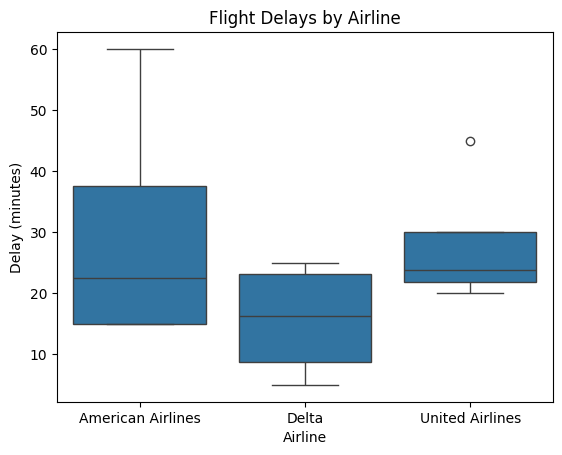

In [18]:
plt.subplot(1, 1, 1)
sns.boxplot(x='Airline', y='DelayMinutes', data=df_flight)
plt.title('Flight Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')

In [20]:
#b. Calculate the average delay for each airline.
df_flight.groupby('Airline')['DelayMinutes'].mean()

,DelayMinutes
Airline,
American Airlines,30.000
Delta,15.625
United Airlines,28.125


In [21]:
import matplotlib.pyplot as plt
df_flight['DepartureHour'] = pd.to_datetime(df_flight['DepartureDateTime'])

# Grouping by departure hour to calculate average delay
delay_analysis = df_flight.groupby('DepartureHour')['DelayMinutes'].mean().reset_index()

print(delay_analysis)

         DepartureHour  DelayMinutes
0  2023-09-01 08:30:00          22.5
1  2023-09-01 13:15:00           5.0
2  2023-09-01 17:00:00          25.0
3  2023-09-02 14:00:00          22.5
4  2023-09-02 17:00:00          20.0
5  2023-09-02 20:30:00          60.0
6  2023-09-03 08:30:00          15.0
7  2023-09-03 13:00:00          10.0
8  2023-09-03 15:00:00          22.5
9  2023-09-04 12:30:00          25.0
10 2023-09-04 19:00:00          45.0


Conclusion:Hence It says that the flight which departing late ie. 8:30 PM or 7:00 PM is delaying and it can also be said that acooring to this data the flight which is departing after 6:00 PM is likely to be dealyed much in time.

<ipython-input-22-88abe74a6129>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='DelayMinutes', data=average_delay, palette='viridis')


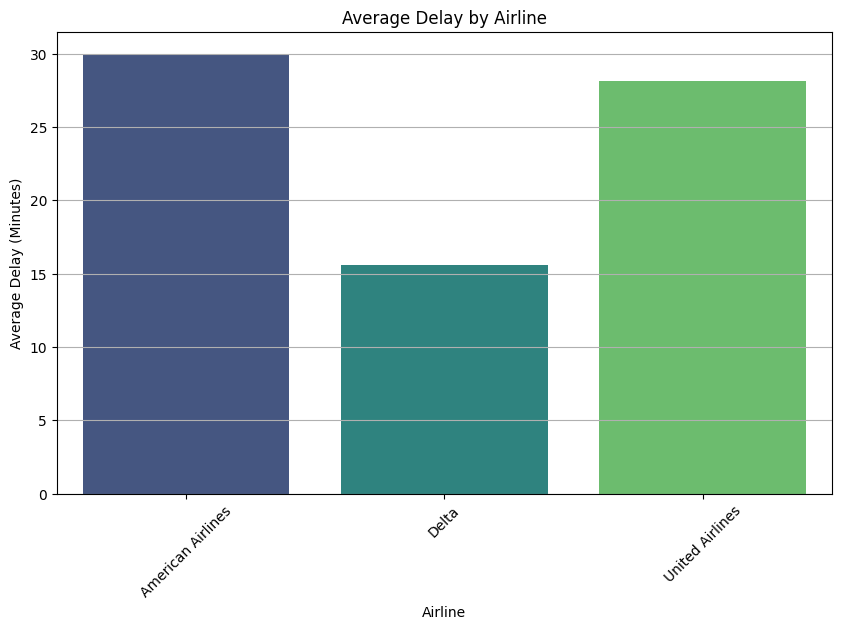

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average delay by airline
average_delay = df_flight.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Bar chart for average delay by airline
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='DelayMinutes', data=average_delay, palette='viridis')
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [25]:
df_flight.to_csv('cleaned_aviation_dataaa.csv', index=False)
files.download('cleaned_aviation_dataaa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>